In [1]:
"""
抽样率对TSHPO的影响
"""
from tshpo.lib_class import AnaHelper

df = AnaHelper.load_csv_file("Q11_effect_of_fsm_original_20250515_1225.csv.gz")
df

,Unnamed: 0,id,default_max,default_min,status,#instances,model_training_time,data_processing_time,walk_time,configs_and_metrics,...,is_trim_sp,n_high_performing_model,n_samples_for_each_model,hpo_opt_method,max_samples,n_exploration,data_sample_method,data_sample_rate,hpc,parsed_configs_and_metrics
0,0,45bc731914e2c71ab3efd8d5dd34e098,0.1602,0.0512,success,100,172.3342,0.0052,315.77,[(Configuration(values={\n '__choice__': 'ada...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
1,0,7a83d5897295719619879bfa2a6e8756,0.1641,0.0751,success,100,158.2835,0.0028,307.05,[(Configuration(values={\n '__choice__': 'ada...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
2,0,a6ccbe34788508fbececad207a5c9b8b,0.1758,0.0234,success,100,159.4669,0.0027,317.09,[(Configuration(values={\n '__choice__': 'ada...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
3,0,4ee85c47e5917f780720a5b47ad255d2,0.2205,0.0399,success,100,193.1643,0.0026,345.08,[(Configuration(values={\n '__choice__': 'ada...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
4,0,92b841ef53a0886c902c1c72e7145558,0.1962,0.0247,success,100,196.6357,0.0024,343.26,[(Configuration(values={\n '__choice__': 'ada...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0,32beea22c67e41db90ef4601a3ea7948,0.3750,0.0263,success,100,381.6097,0.0017,387.87,[(Configuration(values={\n '__choice__': 'ext...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
1796,0,9d45e6676e1b53c2d1b23ce366267757,0.4429,0.0198,success,100,407.2754,0.0029,377.42,[(Configuration(values={\n '__choice__': 'ext...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
1797,0,b6a09de5e8234c0235bcdedc970e71f4,0.4935,0.0468,success,100,317.1972,0.0019,380.50,[(Configuration(values={\n '__choice__': 'ext...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...
1798,0,dea1eb386ff66912396ca29531ca1ad3,0.5424,0.0352,success,100,454.1385,0.0020,374.27,[(Configuration(values={\n '__choice__': 'ext...,...,False,NaN,NaN,BO,NaN,NaN,RS,1,NaN,config_index model default elapse...


<Axes: xlabel='feature_selec_method', ylabel='metric_100'>

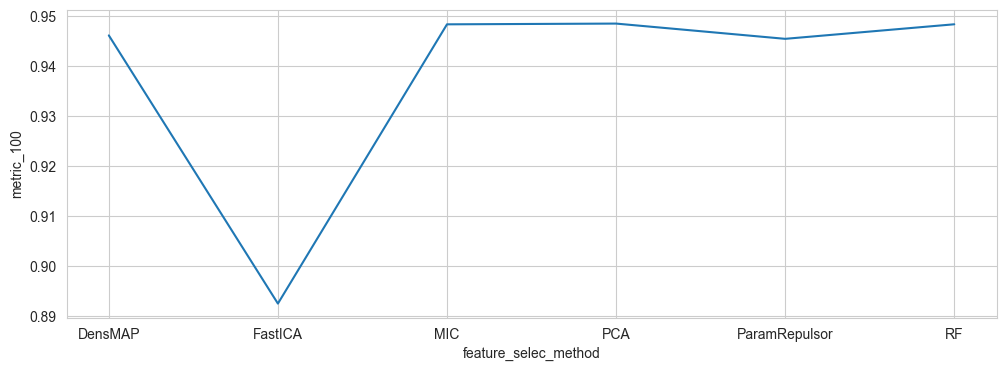

In [27]:
# 特征降维为0.8时，算法的表现
fcr_df = AnaHelper.append_accuracy_of_diff_iterations_by_metric(
    df.query('metric=="roc_auc" and feature_selec_rate==0.5'), [100], "roc_auc")
fcr_df_plot = fcr_df.groupby(by=['feature_selec_method'])['metric_100'].mean()
fcr_df_plot = fcr_df_plot.reset_index()

from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(111)
sns.lineplot(fcr_df_plot, x="feature_selec_method", y="metric_100", ax=ax)
# ax.set_ylim(0.9, 0.95)

In [17]:
df.columns

Index(['Unnamed: 0', 'id', 'default_max', 'default_min', 'status',
       '#instances', 'model_training_time', 'data_processing_time',
       'walk_time', 'configs_and_metrics', 't__stopwatch_',
       't_bo_optimization', 't_bo_warm_up', 't_data_processing',
       't_loadamd_splinta_saampling', 't_dim_reduction', 't_model_predictoin',
       't_model_training', 't_optimization', 't_pca', 't_warm_up_selection',
       'dataset', 'folds', 'fold_index', 'random_state', 'config_file_name',
       'metric', 'wall_time_limit_in_s', 'debug', 'bo_n_warm_start',
       'n_warm_start', 'feature_selec_method', 'feature_selec_rate',
       'init_data_size', 'warm_start_selection_iteration', 'sample_step',
       'stop_threshold', 'max_iteration', 'model_name', 'is_trim_sp',
       'n_high_performing_model', 'n_samples_for_each_model', 'hpo_opt_method',
       'max_samples', 'n_exploration', 'data_sample_method',
       'data_sample_rate', 'hpc', 'parsed_configs_and_metrics'],
      dtype='object

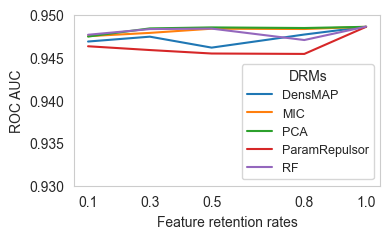

In [81]:
from pyutils.matplotlib.util_axes import UtilAxes

# - ParamRepulsor # - UMAP - DensMAP - FastICA - MIC - PCA - RF
fcm_df = AnaHelper.append_accuracy_of_diff_iterations_by_metric(
    df.query('metric=="roc_auc" and feature_selec_method!="FastICA"'), [100], "roc_auc")
fcm_df = fcm_df.groupby(by=['feature_selec_rate', 'feature_selec_method'])['metric_100'].mean()
fcm_plot_df = fcm_df.reset_index()

from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(4, 2.5))
ax = fig.add_subplot(111)
sns.lineplot(fcm_plot_df, x="feature_selec_rate", y="metric_100", ax=ax, hue="feature_selec_method")
# 设置ax的x轴显示0.1，0.3，0.5，0.7，1.0
ax.set_xticks([0.1, 0.3, 0.5, 0.8, 1.0])
# 设置ylabel 为 ROC AUC
ax.set_ylabel("ROC AUC")
# 设置x轴为 feature select rate
ax.set_xlabel("Feature retention rates")
# 设置ax的legend在外侧,放到图的外面去
# 缩小legend 的字体
ax.legend(loc='lower right', title="DRMs", fontsize=9, title_fontsize=10)
# ax.legend(loc='lower right', title="DRM")
ax.grid(False)
ax.set_ylim(0.93, 0.95)
plt.tight_layout()
fig.savefig("Q11_effect_of_fsrandfsm.pdf", dpi=300)
